🔍 GRANGER CAUSALITY ANALYSIS

Research Question: Does renewable energy adoption predict inflation?
Or does inflation predict renewable adoption?

✅ Data loaded: (792, 69)

TESTING: Renewable → Inflation

Country: Turkey (Emerging, High Import Dep.) (TUR)
✓ Using 24 observations from 2000 to 2023

📊 TEST 1: Renewable Energy → Inflation
--------------------------------------------------
  Lag 1: p-value = 0.2118 
  Lag 2: p-value = 0.4999 
  Lag 3: p-value = 0.3957 
  Lag 4: p-value = 0.3606 

📊 TEST 2: Inflation → Renewable Energy
--------------------------------------------------
  Lag 1: p-value = 0.2119 
  Lag 2: p-value = 0.0247 **
  Lag 3: p-value = 0.0388 **
  Lag 4: p-value = 0.0866 *

📌 INTERPRETATION:
  ✗ No evidence that renewable energy predicts inflation
  ✓ Inflation changes PREDICT renewable adoption (p < 0.05)

Country: Poland (Turkey Peer) (POL)
✓ Using 24 observations from 2000 to 2023

📊 TEST 1: Renewable Energy → Inflation
---------------------------------------------

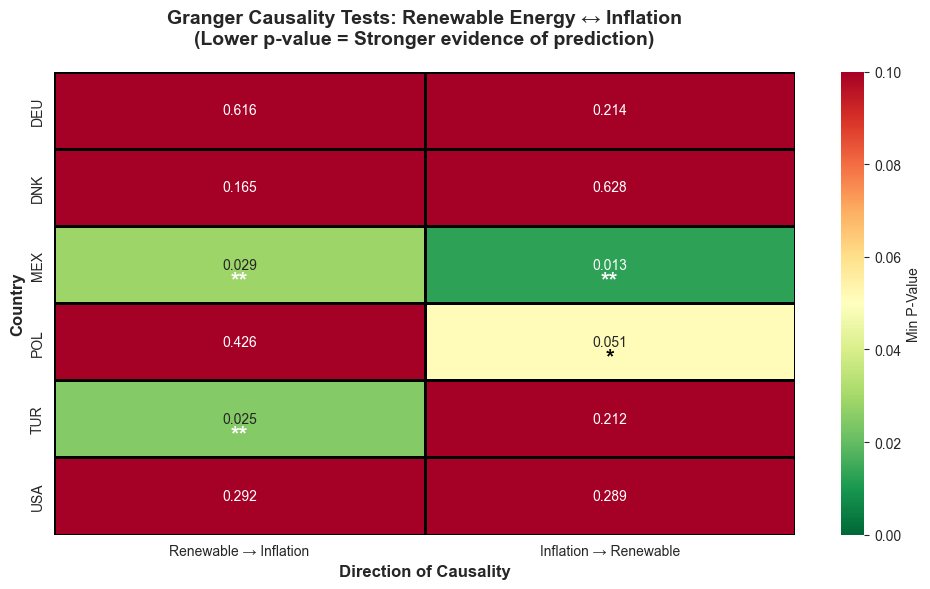

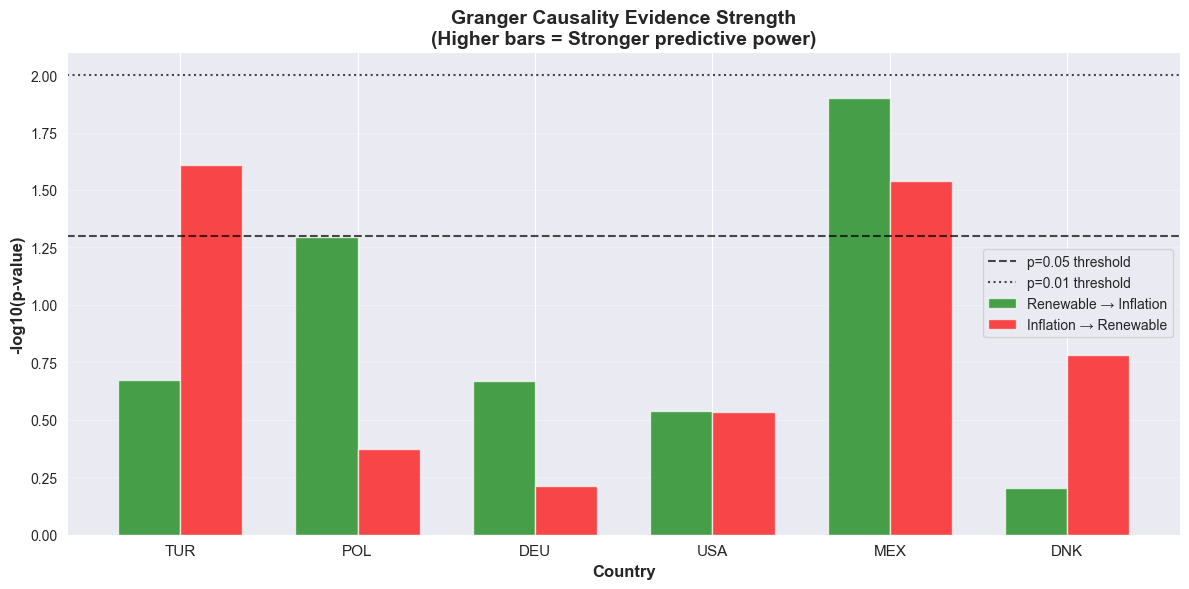


🎯 KEY FINDINGS

1. Countries where RENEWABLE → INFLATION (at p<0.05):
   MEX
   → Suggests green transition may have short-term inflationary pressures

2. Countries where INFLATION → RENEWABLE (at p<0.05):
   TUR, MEX
   → Suggests inflation may drive energy transition (cost pressures?)

3. Turkey-specific finding:
   ✗ No strong evidence of renewable→inflation causality
   → Green transition may not be primary inflation driver
   ✓ Evidence that inflation predicts renewable adoption
   → Possible policy response or economic restructuring

✅ GRANGER CAUSALITY ANALYSIS COMPLETE

Note: Granger causality tests PREDICTION, not true causation.
Results should be interpreted alongside economic theory and other evidence.

Figures saved to: ../outputs/figures/


In [2]:
# Granger Causality Analysis for Green Trap Study
# Tests whether renewable energy changes "cause" inflation changes (in statistical sense)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tools.sm_exceptions import InfeasibleTestError
import sys
import os
import warnings

# Suppress FutureWarnings from statsmodels
warnings.filterwarnings('ignore', category=FutureWarning, module='statsmodels')

sys.path.append(os.path.abspath('../src'))
import config

print("="*80)
print("🔍 GRANGER CAUSALITY ANALYSIS")
print("="*80)
print("\nResearch Question: Does renewable energy adoption predict inflation?")
print("Or does inflation predict renewable adoption?")
print("="*80)

# Load data
df = pd.read_csv(config.PROCESSED_DATA_PATH)
print(f"\n✅ Data loaded: {df.shape}")

# Select countries for analysis
test_countries = {
    'TUR': 'Turkey (Emerging, High Import Dep.)',
    'POL': 'Poland (Turkey Peer)',
    'DEU': 'Germany (Green Leader)',
    'USA': 'USA (Advanced)',
    'MEX': 'Mexico (Peer)',
    'DNK': 'Denmark (Green Leader)'
}

# Parameters
max_lags = 4  # Test up to 4 years of lags
variables = ['Renewable_Energy_Consumption_Pct', 'Inflation_CPI_Pct']

results_summary = []

print("\n" + "="*80)
print("TESTING: Renewable → Inflation")
print("="*80)

for country_code, country_name in test_countries.items():
    print(f"\n{'='*60}")
    print(f"Country: {country_name} ({country_code})")
    print('='*60)

    # Get country data
    country_df = df[df['Country_Code'] == country_code].sort_values('Year')

    if len(country_df) < 15:
        print(f"⚠️  Insufficient data ({len(country_df)} observations)")
        continue

    # Prepare time series
    ts_data = country_df[variables].dropna()

    if len(ts_data) < 15:
        print(f"⚠️  Insufficient complete observations ({len(ts_data)})")
        continue

    print(f"✓ Using {len(ts_data)} observations from {country_df['Year'].min()} to {country_df['Year'].max()}")

    # Test 1: Does Renewable → Inflation?
    try:
        print("\n📊 TEST 1: Renewable Energy → Inflation")
        print("-" * 50)
        # grangercausalitytests expects [dependent, independent]
        test_data_1 = ts_data[['Inflation_CPI_Pct', 'Renewable_Energy_Consumption_Pct']]
        gc_results_1 = grangercausalitytests(test_data_1, maxlag=max_lags, verbose=False)

        # Extract p-values for F-test
        p_values_1 = []
        for lag in range(1, max_lags + 1):
            if lag in gc_results_1:
                p_val = gc_results_1[lag][0]['ssr_ftest'][1]
                p_values_1.append(p_val)
                sig = "***" if p_val < 0.01 else "**" if p_val < 0.05 else "*" if p_val < 0.1 else ""
                print(f"  Lag {lag}: p-value = {p_val:.4f} {sig}")

        min_p_1 = min(p_values_1) if p_values_1 else 1.0

    except Exception as e:
        print(f"  ❌ Test failed: {str(e)[:100]}")
        min_p_1 = 1.0
        p_values_1 = [1.0]

    # Test 2: Does Inflation → Renewable?
    try:
        print("\n📊 TEST 2: Inflation → Renewable Energy")
        print("-" * 50)
        test_data_2 = ts_data[['Renewable_Energy_Consumption_Pct', 'Inflation_CPI_Pct']]
        gc_results_2 = grangercausalitytests(test_data_2, maxlag=max_lags, verbose=False)

        p_values_2 = []
        for lag in range(1, max_lags + 1):
            if lag in gc_results_2:
                p_val = gc_results_2[lag][0]['ssr_ftest'][1]
                p_values_2.append(p_val)
                sig = "***" if p_val < 0.01 else "**" if p_val < 0.05 else "*" if p_val < 0.1 else ""
                print(f"  Lag {lag}: p-value = {p_val:.4f} {sig}")

        min_p_2 = min(p_values_2) if p_values_2 else 1.0

    except Exception as e:
        print(f"  ❌ Test failed: {str(e)[:100]}")
        min_p_2 = 1.0
        p_values_2 = [1.0]

    # Interpretation
    print("\n📌 INTERPRETATION:")
    if min_p_1 < 0.05:
        print("  ✓ Renewable energy changes PREDICT inflation (p < 0.05)")
    else:
        print("  ✗ No evidence that renewable energy predicts inflation")

    if min_p_2 < 0.05:
        print("  ✓ Inflation changes PREDICT renewable adoption (p < 0.05)")
    else:
        print("  ✗ No evidence that inflation predicts renewable adoption")

    if min_p_1 < 0.05 and min_p_2 < 0.05:
        print("  ⚠️  BIDIRECTIONAL causality detected!")
    elif min_p_1 >= 0.05 and min_p_2 >= 0.05:
        print("  ℹ️  No clear causal relationship found")

    # Store results
    results_summary.append({
        'Country': country_code,
        'Country_Name': country_name,
        'Renewable→Inflation_MinP': min_p_1,
        'Inflation→Renewable_MinP': min_p_2,
        'Renewable→Inflation_Sig': min_p_1 < 0.05,
        'Inflation→Renewable_Sig': min_p_2 < 0.05
    })

# ============================================================================
# SUMMARY VISUALIZATION
# ============================================================================
print("\n\n" + "="*80)
print("📊 SUMMARY OF GRANGER CAUSALITY TESTS")
print("="*80)

results_df = pd.DataFrame(results_summary)
print("\n" + results_df.to_string(index=False))

# Heatmap of p-values
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data for heatmap
heatmap_data = results_df.pivot_table(
    index='Country',
    values=['Renewable→Inflation_MinP', 'Inflation→Renewable_MinP']
)
heatmap_data.columns = ['Renewable → Inflation', 'Inflation → Renewable']

# Plot
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn_r',
            vmin=0, vmax=0.1, center=0.05, cbar_kws={'label': 'Min P-Value'},
            linewidths=1, linecolor='black', ax=ax)

# Add significance markers
for i, country in enumerate(heatmap_data.index):
    for j, col in enumerate(heatmap_data.columns):
        p_val = heatmap_data.iloc[i, j]
        if p_val < 0.01:
            ax.text(j + 0.5, i + 0.7, '***', ha='center', va='center',
                   fontsize=16, fontweight='bold', color='white')
        elif p_val < 0.05:
            ax.text(j + 0.5, i + 0.7, '**', ha='center', va='center',
                   fontsize=16, fontweight='bold', color='white')
        elif p_val < 0.1:
            ax.text(j + 0.5, i + 0.7, '*', ha='center', va='center',
                   fontsize=16, fontweight='bold', color='black')

ax.set_title('Granger Causality Tests: Renewable Energy ↔ Inflation\n(Lower p-value = Stronger evidence of prediction)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Direction of Causality', fontsize=12, fontweight='bold')
ax.set_ylabel('Country', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/granger_causality_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Bar chart of significant relationships
fig, ax = plt.subplots(figsize=(12, 6))

countries = results_df['Country'].tolist()
x = np.arange(len(countries))
width = 0.35

renewable_to_inflation = [-np.log10(p) if p > 0 else 0 for p in results_df['Renewable→Inflation_MinP']]
inflation_to_renewable = [-np.log10(p) if p > 0 else 0 for p in results_df['Inflation→Renewable_MinP']]

bars1 = ax.bar(x - width/2, renewable_to_inflation, width, label='Renewable → Inflation',
               color='green', alpha=0.7)
bars2 = ax.bar(x + width/2, inflation_to_renewable, width, label='Inflation → Renewable',
               color='red', alpha=0.7)

# Add significance threshold lines
ax.axhline(-np.log10(0.05), color='black', linestyle='--', linewidth=1.5,
          label='p=0.05 threshold', alpha=0.7)
ax.axhline(-np.log10(0.01), color='black', linestyle=':', linewidth=1.5,
          label='p=0.01 threshold', alpha=0.7)

ax.set_xlabel('Country', fontsize=12, fontweight='bold')
ax.set_ylabel('-log10(p-value)', fontsize=12, fontweight='bold')
ax.set_title('Granger Causality Evidence Strength\n(Higher bars = Stronger predictive power)',
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(countries, fontsize=11)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/granger_causality_bars.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# KEY FINDINGS
# ============================================================================
print("\n" + "="*80)
print("🎯 KEY FINDINGS")
print("="*80)

renewable_causes_inflation = results_df[results_df['Renewable→Inflation_Sig']]['Country'].tolist()
inflation_causes_renewable = results_df[results_df['Inflation→Renewable_Sig']]['Country'].tolist()

print(f"\n1. Countries where RENEWABLE → INFLATION (at p<0.05):")
if renewable_causes_inflation:
    print(f"   {', '.join(renewable_causes_inflation)}")
    print("   → Suggests green transition may have short-term inflationary pressures")
else:
    print("   None found")
    print("   → Limited evidence of 'greenflation' in time-series data")

print(f"\n2. Countries where INFLATION → RENEWABLE (at p<0.05):")
if inflation_causes_renewable:
    print(f"   {', '.join(inflation_causes_renewable)}")
    print("   → Suggests inflation may drive energy transition (cost pressures?)")
else:
    print("   None found")
    print("   → Renewable adoption not primarily inflation-driven")

print(f"\n3. Turkey-specific finding:")
turkey_result = results_df[results_df['Country'] == 'TUR']
if not turkey_result.empty:
    tur_r2i = turkey_result['Renewable→Inflation_Sig'].values[0]
    tur_i2r = turkey_result['Inflation→Renewable_Sig'].values[0]

    if tur_r2i:
        print("   ✓ Evidence that renewable adoption predicts inflation in Turkey")
        print("   → Supports 'green trap' concern for emerging economies")
    else:
        print("   ✗ No strong evidence of renewable→inflation causality")
        print("   → Green transition may not be primary inflation driver")

    if tur_i2r:
        print("   ✓ Evidence that inflation predicts renewable adoption")
        print("   → Possible policy response or economic restructuring")
else:
    print("   Data insufficient for Turkey analysis")

print("\n" + "="*80)
print("✅ GRANGER CAUSALITY ANALYSIS COMPLETE")
print("="*80)
print("\nNote: Granger causality tests PREDICTION, not true causation.")
print("Results should be interpreted alongside economic theory and other evidence.")
print("\nFigures saved to: ../outputs/figures/")